In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
from datetime import datetime, date
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

import geopandas
import branca.colormap as cm
from branca.element import Template, MacroElement
import folium
from folium import plugins

In [2]:
# mac os
font_path = '/Library/Fonts/simhei.ttf'
fontP = font_manager.FontProperties(fname=font_path)
fontP.set_size(14)

## Import datasets

In [3]:
tot_empl_province_df = pd.read_csv('datasets/按行业分城镇单位就业人员(万人)/城镇单位就业人员.csv',
                                   header=3, encoding='gb2312')
tot_empl_province_df = tot_empl_province_df[:31]
tot_empl_province_df = tot_empl_province_df.fillna(0)

In [4]:
tot_salary_province_df = pd.read_csv('datasets/按行业分城镇单位就业人员平均工资(元)/城镇单位就业人员平均工资.csv',
                                   header=3, encoding='gb2312')
tot_salary_province_df = tot_salary_province_df[:31]
tot_salary_province_df = tot_salary_province_df.fillna(0)

In [5]:
tot_chomageNb_province_df = pd.read_csv('datasets/城镇登记失业人数(万人).csv',
                                   header=3, encoding='gb2312')
tot_chomageNb_province_df = tot_chomageNb_province_df[:31]
tot_chomageNb_province_df = tot_chomageNb_province_df.fillna(0)

In [6]:
tot_chomagePct_province_df = pd.read_csv('datasets/城镇登记失业率(%).csv',
                                         header=3, encoding='gb2312')
tot_chomagePct_province_df = tot_chomagePct_province_df[:31]
tot_chomagePct_province_df = tot_chomagePct_province_df.fillna(0)

In [7]:
emplNb_province_df = pd.read_csv('datasets/empl_nb_final_per_province.csv')
salary_province_df = pd.read_csv('datasets/salary_final_per_province.csv')

## Employee amount

In [8]:
tot_empl_province_df = tot_empl_province_df.sort_values('2019年', ascending=False).reset_index(drop=True)

tot_empl_prov_top10_df = tot_empl_province_df.head(10).set_index('地区').T.iloc[::-1].reset_index()
tot_empl_prov_top10_df['index'] = tot_empl_prov_top10_df['index'].apply(lambda x: x.split('年')[0])
tot_empl_prov_top10_df = tot_empl_prov_top10_df.rename(columns = {'index':'year'})

In [9]:
tot_empl_prov_top10_df

地区,year,广东省,江苏省,山东省,浙江省,河南省,北京市,四川省,上海市,湖北省,福建省
0,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004,0.0,606.9,0.0,456.6,0.0,502.8,0.0,0.0,0.0,377.7
4,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2008,1007.9,707.6,901.4,741.2,714.4,570.3,550.9,377.2,470.3,458.7
8,2009,1055.0,721.3,922.3,813.9,734.7,619.3,564.4,385.4,487.1,474.0
9,2010,1118.5,763.8,956.2,883.6,751.7,646.6,570.6,392.9,510.3,507.1


/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


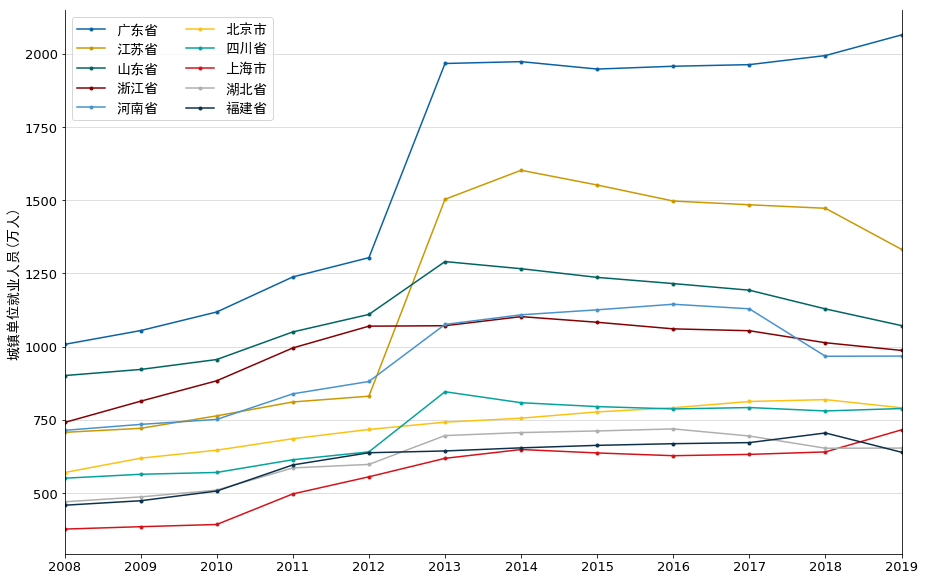

In [10]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

line_gd, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['广东省'][7:-1],
                      color='#0A62A5',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_js, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['江苏省'][7:-1],
                      color='#CC9801',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_sd, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['山东省'][7:-1],
                      color='#006460',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_zj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['浙江省'][7:-1],
                      color='#850003',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_hn, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['河南省'][7:-1],
                      color='#4893cd',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_bj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['北京市'][7:-1],
                      color='#fcc115',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_sc, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['四川省'][7:-1],
                      color='#05a39d',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_sh, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['上海市'][7:-1],
                      color='#d61218',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_hb, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['湖北省'][7:-1],
                      color='#aeafae',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_fj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['福建省'][7:-1],
                      color='#0e314b',
                      linewidth=1.5,
                      marker='.',
#                       markersize=8
                     )



axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 11)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员(万人)', size=13, fontproperties=fontP)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(handles=(line_gd, line_js, line_sd, line_zj, line_hn, 
                      line_bj, line_sc, line_sh, line_hb, line_fj),
             labels=('广东省', '江苏省', '山东省', '浙江省', '河南省',
                     '北京市', '四川省', '上海市', '湖北省', '福建省'),
             ncol=2,
             loc=2, prop=fontP)


截止到2019年，就业人员数最多的十个省/直辖市为广东省、江苏省、山东省、浙江省、河南省、北京市、四川省、上海市、湖北省和福建省。其中，广东省、北京市和上海市的就业人数自2018年以来持续上涨，尤其是广东省，一直位居榜首。华南城市研究会会长、暨南大学教授胡刚分析，近年来珠三角产业转型升级加快，高端制造业、信息经济等新兴产业快速发展，吸引了大量就业人口。同时珠三角地区近年来放开放宽落户限制，也吸引了很多人落户。

## Employee salary

In [11]:
tot_salary_province_df = tot_salary_province_df.sort_values('2019年', ascending=False).reset_index(drop=True)

tot_salary_prov_top10_df = tot_salary_province_df.head(10).set_index('地区').T.iloc[::-1].reset_index()
tot_salary_prov_top10_df['index'] = tot_salary_prov_top10_df['index'].apply(lambda x: x.split('年')[0])
tot_salary_prov_top10_df = tot_salary_prov_top10_df.rename(columns = {'index':'year'})

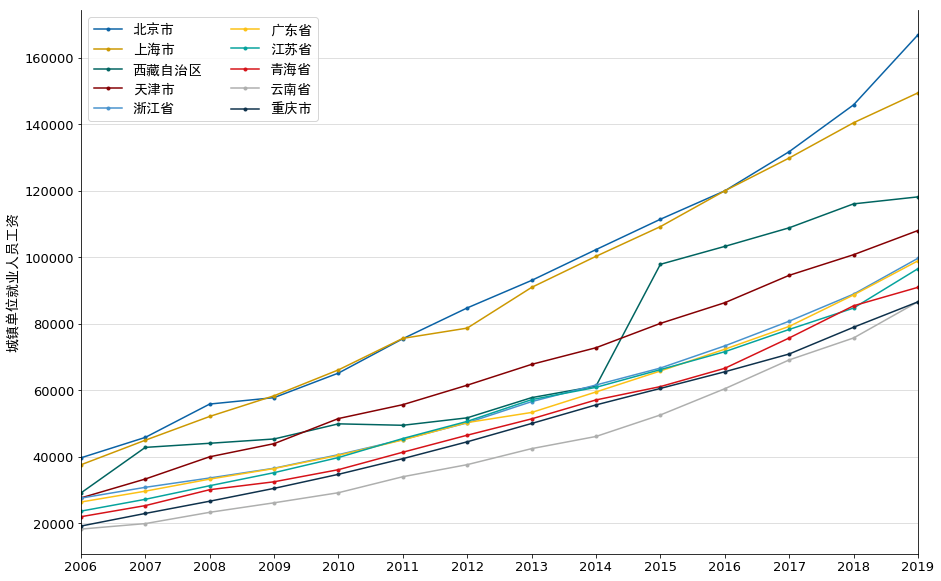

In [12]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

line_bj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['北京市'][5:-1],
                      color='#0A62A5',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_sh, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['上海市'][5:-1],
                      color='#CC9801',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_xz, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['西藏自治区'][5:-1],
                      color='#006460',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_tj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['天津市'][5:-1],
                      color='#850003',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_zj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['浙江省'][5:-1],
                      color='#4893cd',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_gd, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['广东省'][5:-1],
                      color='#fcc115',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_js, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['江苏省'][5:-1],
                      color='#05a39d',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_qh, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['青海省'][5:-1],
                      color='#d61218',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_yn, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['云南省'][5:-1],
                      color='#aeafae',
                      linewidth=1.5,
                      marker='.',
#                       markersize=13
                     )
line_cq, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['重庆市'][5:-1],
                      color='#0e314b',
                      linewidth=1.5,
                      marker='.',
#                       markersize=8
                     )



axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 13)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员工资', size=13, fontproperties=fontP)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(handles=(line_bj, line_sh, line_xz, line_tj, line_zj, 
                      line_gd, line_js, line_qh, line_yn, line_cq),
             labels=('北京市', '上海市', '西藏自治区', '天津市', '浙江省',
                     '广东省', '江苏省', '青海省', '云南省', '重庆市'),
             ncol=2,
             loc=2, prop=fontP)




## Reference

- 林小昭， 第一财经，广东流动人口超5200万，深圳十年猛增700多万人 https://www.yicai.com/news/101051457.html
- 吖海说热点，广东，凭什么成为全国最吸引人口的省份，远超江苏？https://www.sohu.com/a/466646223_120131445
